# Double Derived Markov chain w/ contexts



In [1]:
%%capture
%run receptor_tools_cycle_fluxes.ipynb

In [2]:
dG_house = {0: {1: 'a', 2: 'c', 4: 'f'}, 1: {0: 'A', 2: 'b'}, 2: {0: 'C', 1: 'B', 3: 'd'}, 3: {2: 'D', 4: 'e'}, 4: {3: 'E', 0: 'F'}}
dG_c3_handle = {0: {1: 'a', 2: 'c'}, 1: {0: 'A', 2: 'b'}, 2: {0: 'C', 1: 'B', 3: 'd'}, 3: {2: 'D'}}
dG_c4_chord = {0: {1: 'a', 2: 'c', 3: 'e'}, 1: {0: 'A', 2: 'b'}, 2: {0: 'C', 1: 'B', 3: 'd'}, 3: {0: 'E', 2: 'D'}}
dG_c3_tail = {0: {1: 'a', 2: 'C'}, 1: {0: 'A', 2: 'b'}, 2: {0: 'c', 1: 'B', 3: 'd'}, 3: {2: 'd'}}
dG_p2 = {0: {1: 'a'}, 1: {0: 'A'}}
dG_p3 = {0: {1: 'a'}, 1: {0: 'A', 2: 'b'}, 2: {1: 'B'}}
dG_p4 = {0: {1: 'a'}, 1: {0: 'A', 2: 'b'}, 2: {1: 'B', 3: 'c'}, 3: {2: 'C'}}
dG_c3 = {0: {1:'a', 2:'C'}, 1: {0:'A', 2:'b'}, 2: {0:'c', 1:'B'}}

dG = dG_c3 # choose graph here (dG may be used below)

G, Vg = graph_and_edge_ring_from_dict(dG)


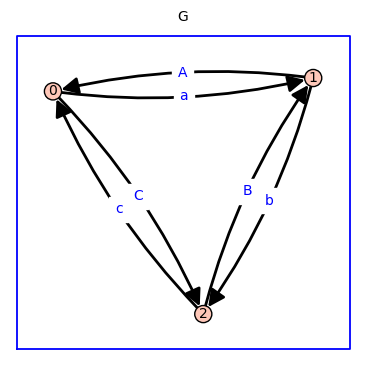


[-C - a      a      C]
[     A -b - A      b]
[     c      B -B - c]

For root/cycle [0] : A*B + b*c + A*c 

For root/cycle [1] : C*B + a*B + a*c 

For root/cycle [2] : C*b + a*b + C*A 

G cycles p: [(0, 1, 2, 0)] 

G cycles m: [(0, 2, 1, 0)] 

G cycles 2: [(0, 1, 0), (0, 2, 0), (1, 2, 1)] 


G cycle flux 0 : a * b * c

G cycle flux 1 : C * A * B

G cycle flux 2 : a * A * (B + c)

G cycle flux 3 : C * (b + A) * c

G cycle flux 4 : (C + a) * b * B



In [3]:
nvG, neG, betaG, Tg, TG, cycleG_p, cycleG_m, cycleG_2, cycleG, Jg, dict_vG, inverted_dict_vG, d_cycleG, inverted_d_cycleG =  cycle_flux_analysis(G,str='G')

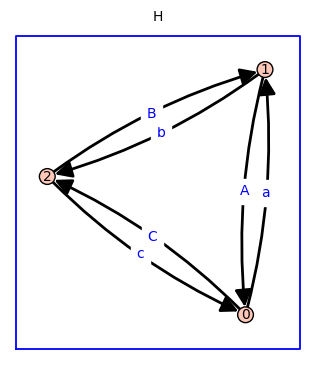


[-C - a      a      C]
[     A -b - A      b]
[     c      B -B - c]

For root/cycle [0] : A*B + b*c + A*c 

For root/cycle [1] : C*B + a*B + a*c 

For root/cycle [2] : C*b + a*b + C*A 

H cycles p: [(0, 1, 2, 0)] 

H cycles m: [(0, 2, 1, 0)] 

H cycles 2: [(0, 1, 0), (0, 2, 0), (1, 2, 1)] 


H cycle flux 0 : a * b * c

H cycle flux 1 : C * A * B

H cycle flux 2 : a * A * (B + c)

H cycle flux 3 : C * (b + A) * c

H cycle flux 4 : (C + a) * b * B



In [4]:
dH_c5 = {0: {1: 'v', 2: 'x', 4: 'Z'}, 1: {0: 'V', 2: 'w'}, 2: {1: 'W', 3: 'x'}, 3: {2: 'X', 4: 'y'}, 4: {0: 'z', 3: 'Y'}}
dH_c3 = {0: {1: 'x', 2: 'Z'}, 1: {0: 'X', 2: 'y'}, 2: {0: 'z', 1: 'Y'}}
dH_p4 = {0: {1: 'x'}, 1: {0: 'X', 2: 'y'}, 2: {1: 'Y', 3: 'z'}, 3: {2: 'Z'}}
dH_p3 = {0: {1: 'x'}, 1: {0: 'X', 2: 'y'}, 2: {1: 'Y'}}
dH_p2 = {0: {1: 'x'}, 1: {0: 'X'}}

dH_p2_r2 = {2: {3: 'x'}, 3: {2: 'X'}}
dH_c3_r3 = {3: {4: 'x', 5: 'Z'}, 4: {3: 'X', 5: 'y'}, 5: {3: 'z', 4: 'Y'}}
dH_p3_r3 = {3: {4: 'x'}, 4: {3: 'X', 5: 'y'}, 5: {4: 'Y'}}

dH = copy(dG);
#dH = dH_p2_r2

H, Vh = graph_and_edge_ring_from_dict(dH)
nvH, neH, betaH, Th, TH, cycleH_p, cycleH_m, cycleH_2, cycleH, Jh, dict_vH, inverted_dict_vH, d_cycleH, inverted_d_cycleH =  cycle_flux_analysis(H,str='H')

Multivariate Polynomial Ring in B, C, c, a, A, b over Integer Ring


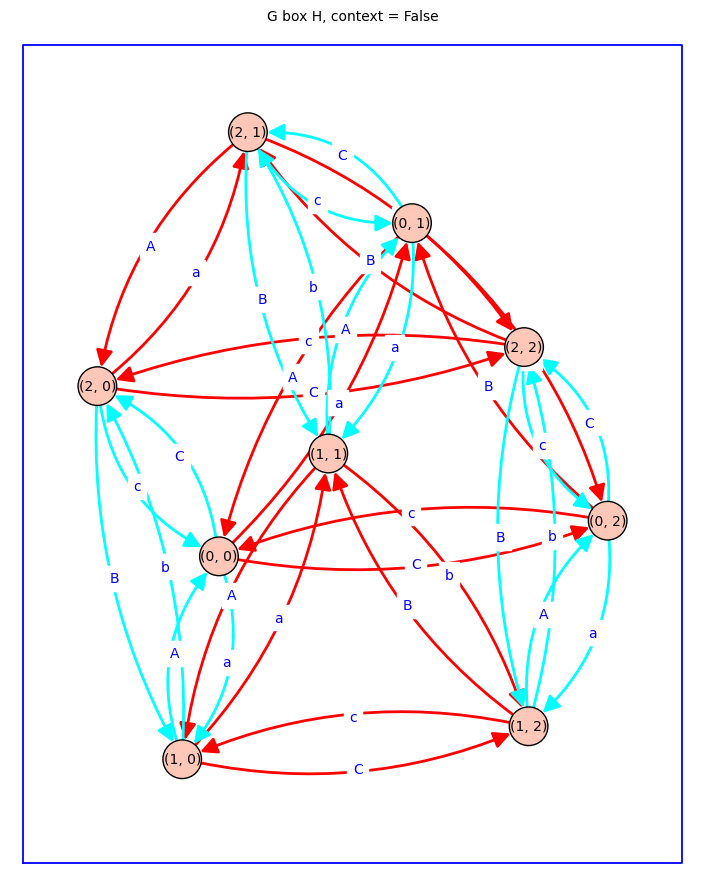

Multivariate Polynomial Ring in a2, b2, a0, A1, B0, A2, B2, a1, b1, b0, C1, C2, c0, c1, B1, A0, c2, C0 over Integer Ring


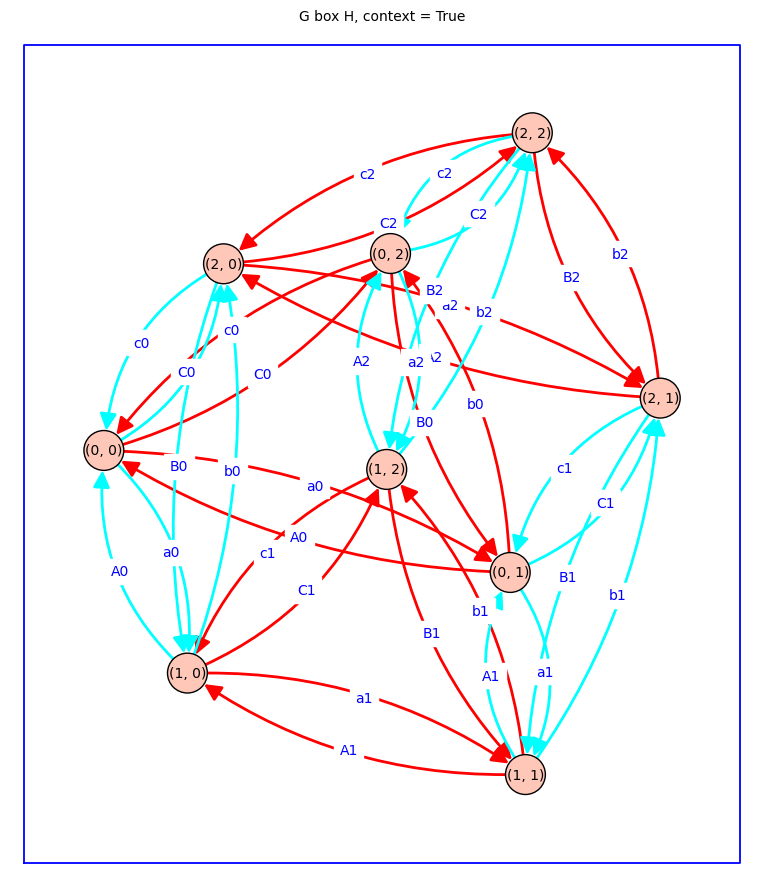

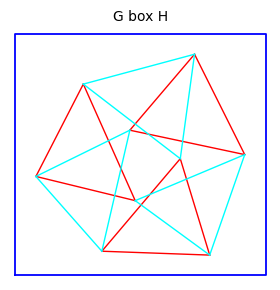

In [5]:
for context in [ False, True ]:
    GH = Cartesian_product(G, H, context=context)
    print(edge_ring_from_graph(GH))
    GH.show(edge_labels=True,figsize=12,graph_border=True,\
           edge_colors=cartesian_edge_color(GH,verbose=False),\
            title='G box H, context = ' + str(context))

GH0 = GH.to_undirected()
GH0.show(edge_labels=False,vertex_labels=False,vertex_size=0,figsize=4,graph_border=True,edge_colors=cartesian_edge_color(GH0,verbose=False),title='G box H')


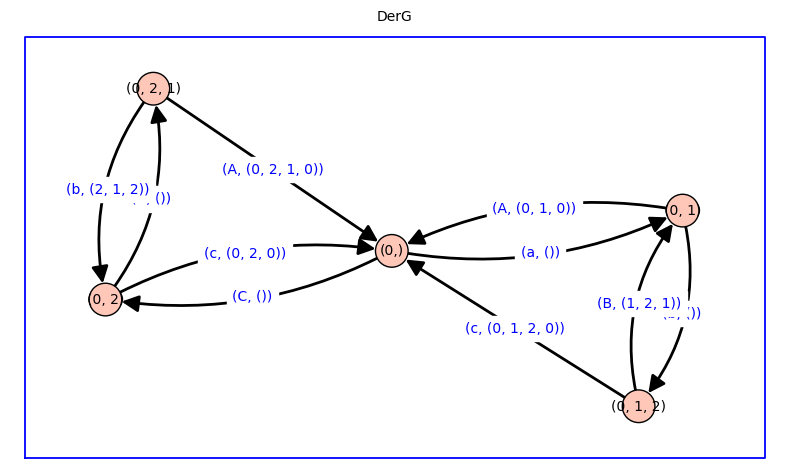

In [6]:
DerG = derived_graph(G)
DerG.show(edge_labels=True,figsize=8,graph_border=True,title='DerG')

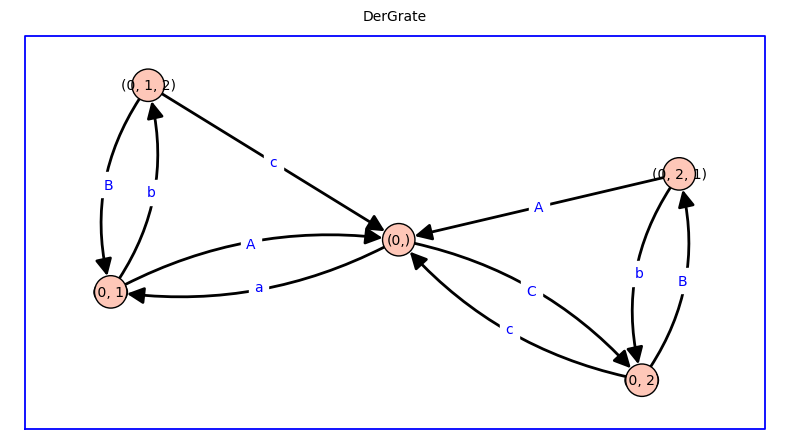

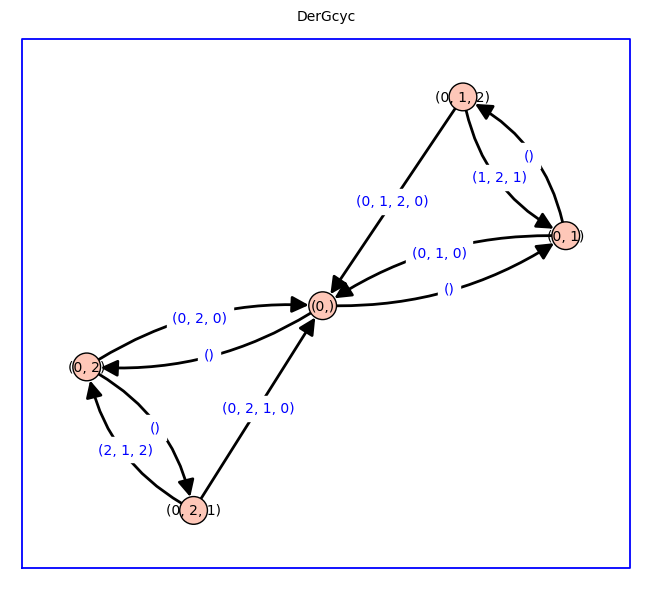

In [7]:
DerGrate, DerGcyc = split_derived_graph(DerG)
DerGrate.show(edge_labels=True,figsize=8,graph_border=True,title='DerGrate')
DerGcyc.show(edge_labels=True,figsize=8,graph_border=True,title='DerGcyc')

In [8]:
dict_Jg = cycle_fluxes_from_derived_graph(DerG,verbose=True)

rooted spanning tree of derived graph T(0,0) = (A*B + b*c + A*c) * (A*B + C*B + a*B + b*c + A*c + a*c + C*b + a*b + C*A) 

J (0, 1, 0) = a * A * (B + c) * (A*B + b*c + A*c) 

J (0, 1, 2, 0) = a * b * c * (A*B + b*c + A*c) 

J (1, 2, 1) = a * b * B * (A*B + b*c + A*c) 

J (0, 2, 0) = C * (b + A) * c * (A*B + b*c + A*c) 

J (0, 2, 1, 0) = C * A * B * (A*B + b*c + A*c) 

J (2, 1, 2) = C * b * B * (A*B + b*c + A*c) 



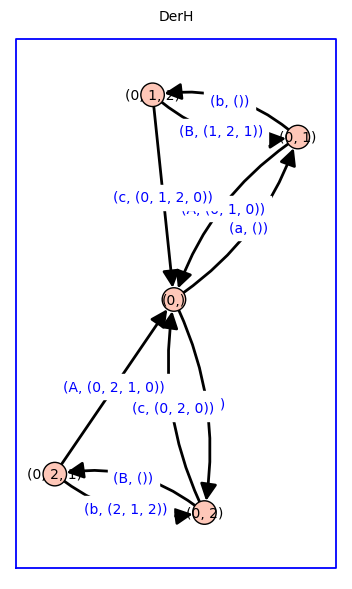

In [9]:
DerH = derived_graph(H)
DerH.show(edge_labels=True,figsize=8,graph_border=True,title='DerH')
DerHrate, DerHcyc = split_derived_graph(DerH)

In [10]:
dict_Jh = cycle_fluxes_from_derived_graph(DerH,verbose=True)

rooted spanning tree of derived graph T(0,0) = (A*B + b*c + A*c) * (A*B + C*B + a*B + b*c + A*c + a*c + C*b + a*b + C*A) 

J (0, 1, 0) = a * A * (B + c) * (A*B + b*c + A*c) 

J (0, 1, 2, 0) = a * b * c * (A*B + b*c + A*c) 

J (1, 2, 1) = a * b * B * (A*B + b*c + A*c) 

J (0, 2, 0) = C * (b + A) * c * (A*B + b*c + A*c) 

J (0, 2, 1, 0) = C * A * B * (A*B + b*c + A*c) 

J (2, 1, 2) = C * b * B * (A*B + b*c + A*c) 



***
*** context = False   reduce = False
***
Multivariate Polynomial Ring in B, C, c, a, A, b over Integer Ring


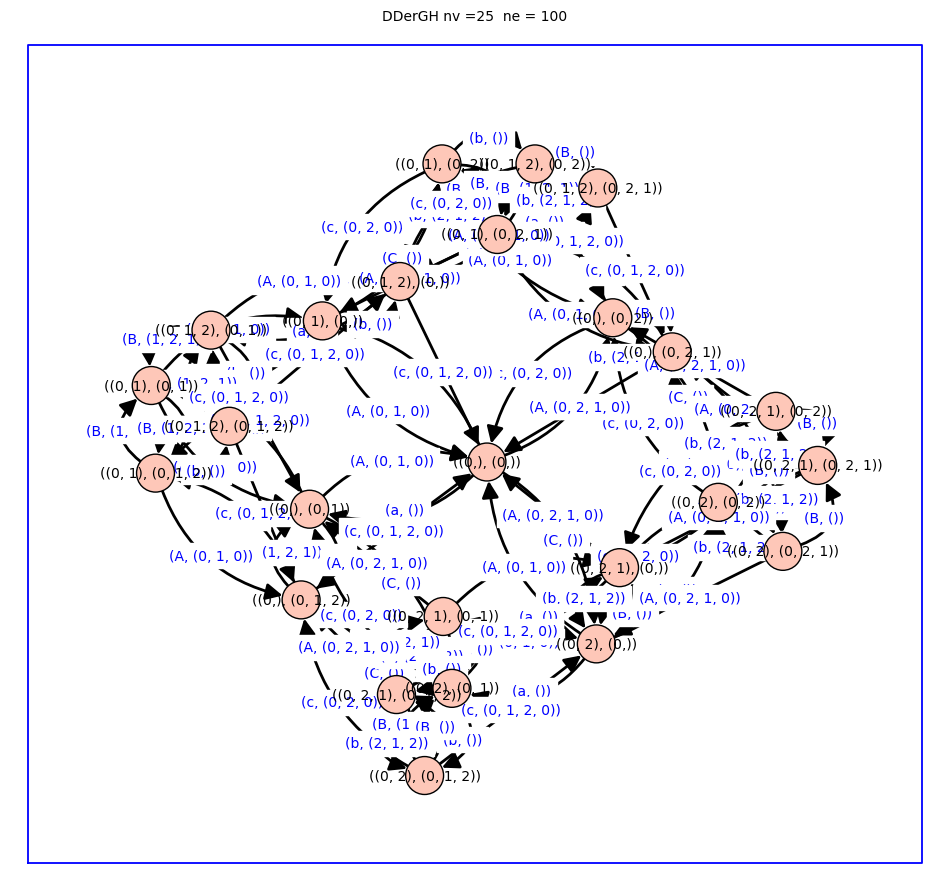

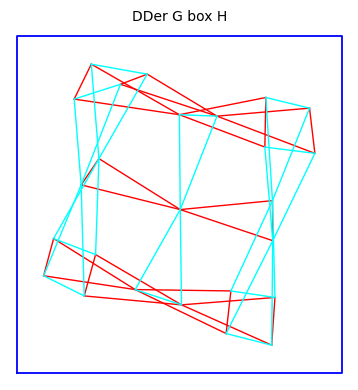

***
*** context = False   reduce = True
***
Multivariate Polynomial Ring in B, C, c, a, A, b over Integer Ring


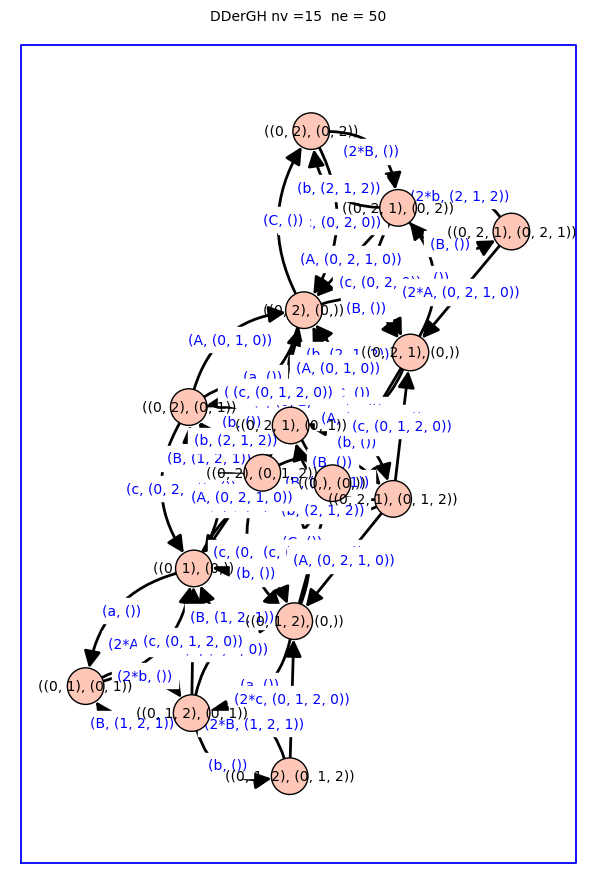

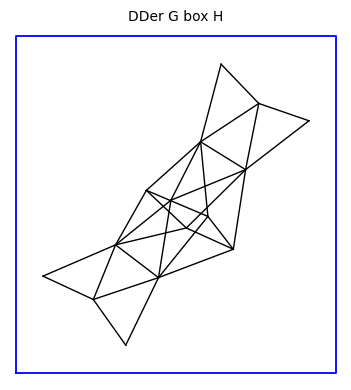

***
*** context = True   reduce = False
***
Multivariate Polynomial Ring in a2, b2, a0, A1, B0, A2, B2, a1, b1, b0, C1, C2, c0, c1, B1, A0, c2, C0 over Integer Ring


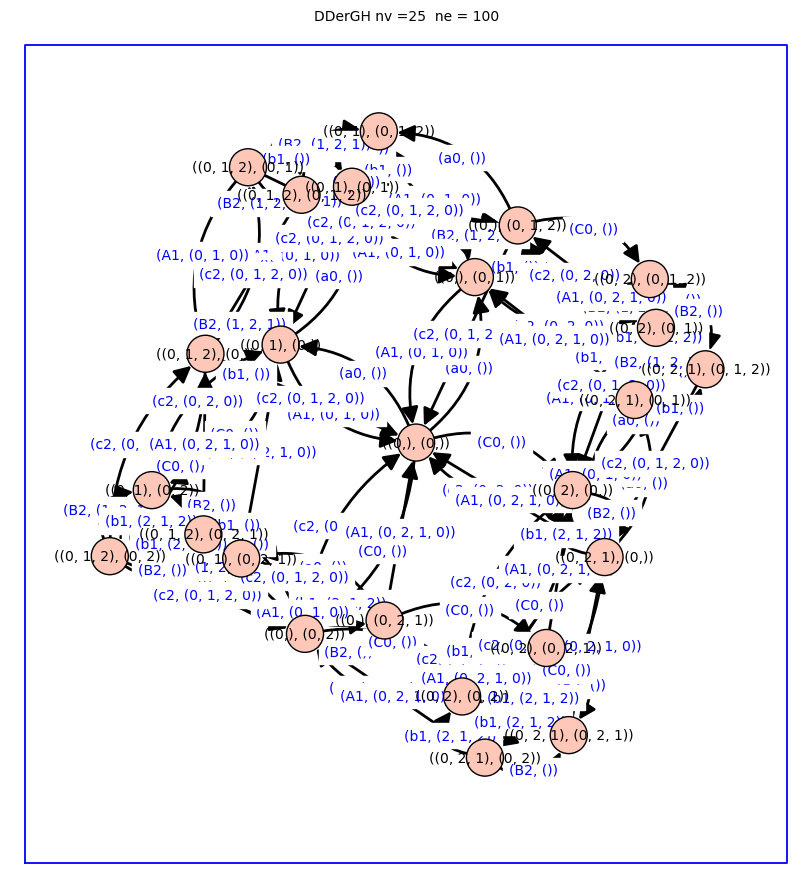

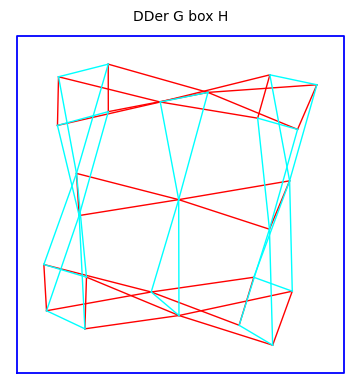

***
*** context = True   reduce = True
***
Multivariate Polynomial Ring in a2, b2, a0, A1, B0, A2, B2, a1, b1, b0, C1, C2, c0, c1, B1, A0, c2, C0 over Integer Ring


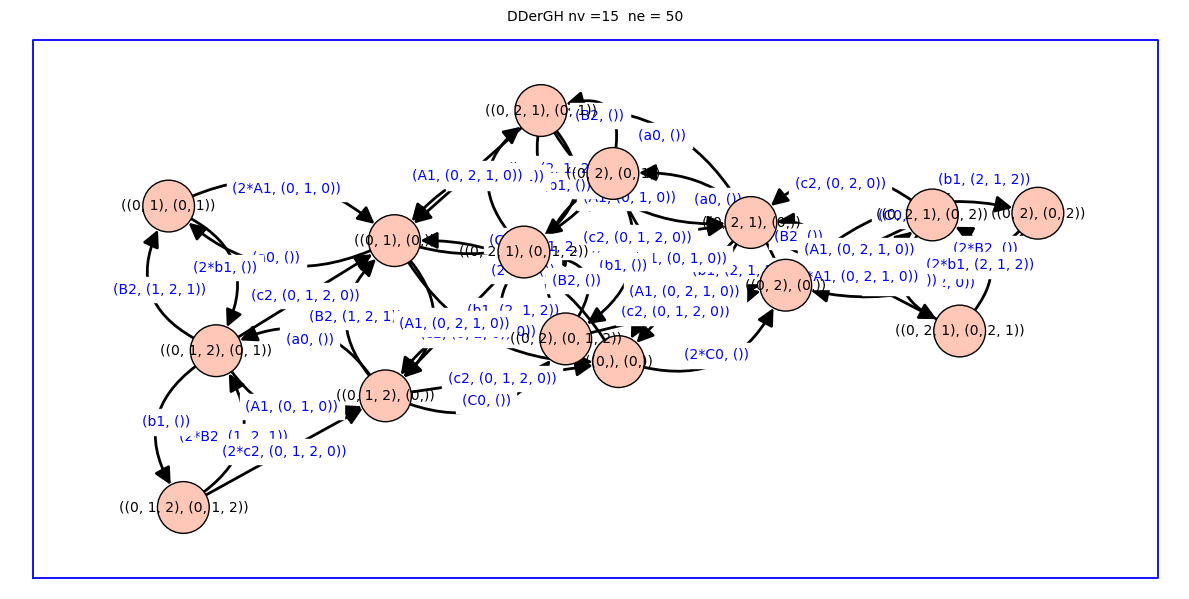

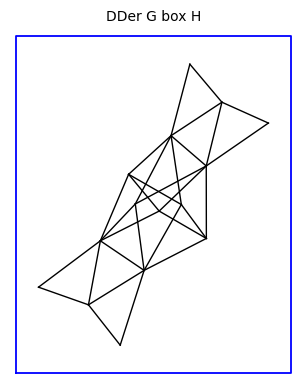

In [11]:
for context in [ False, True]:
    for reduce in [ False, True]:
        print('***')
        print('*** context =', str(context), '  reduce =', str(reduce))
        print('***')
        DDerGH = double_derived_graph(DerG,DerH,context=context,reduce=reduce)
        print(edge_ring_from_derived_graph(DDerGH))
        DDerGH.show(edge_labels=True,figsize=12,graph_border=True,\
                title='DDerGH '+'nv ='+str(DDerGH.order())+'  ne = '+str(DDerGH.size()))
        DDerGH0 = DDerGH.to_undirected()
        if reduce==False:
            edge_colors=cartesian_edge_color(DDerGH0,verbose=False)
        else:
            edge_colors=None
        DDerGH0.show(edge_colors=edge_colors,vertex_size=0,\
                     vertex_labels=False,graph_border=True,title='DDer G box H')

In [12]:
DDerGH = double_derived_graph(DerG,DerH,context=False,reduce=True)
dict_Jg_lumped_merge = cycle_fluxes_from_derived_graph(DDerGH,verbose=False,big=False)
for key in dict_Jg_lumped_merge:
    print(key,':',dict_Jg_lumped_merge[key],'\n')

(0, 1, 0) : 2^5 * A * a * (B + c) * (B + c + A + b) * (B + C + c + a + A + b) * (B*A + c*A + c*b)^2 * (B*C + B*a + c*a + B*A + C*A + c*A + C*b + c*b + a*b) * (2*B^3*C + 2*B^2*C^2 + 4*B^2*C*c + B*C^2*c + 2*B*C*c^2 + 2*B^3*a + 4*B^2*C*a + 6*B^2*c*a + 5*B*C*c*a + 6*B*c^2*a + C*c^2*a + 2*c^3*a + 2*B^2*a^2 + 4*B*c*a^2 + 2*c^2*a^2 + 4*B^3*A + 10*B^2*C*A + 5*B*C^2*A + 12*B^2*c*A + 16*B*C*c*A + 2*C^2*c*A + 12*B*c^2*A + 6*C*c^2*A + 4*c^3*A + 8*B^2*a*A + 7*B*C*a*A + 16*B*c*a*A + 6*C*c*a*A + 8*c^2*a*A + 2*B*a^2*A + 2*c*a^2*A + 8*B^2*A^2 + 10*B*C*A^2 + 2*C^2*A^2 + 16*B*c*A^2 + 8*C*c*A^2 + 8*c^2*A^2 + 6*B*a*A^2 + C*a*A^2 + 6*c*a*A^2 + 4*B*A^3 + 2*C*A^3 + 4*c*A^3 + 6*B^2*C*b + 4*B*C^2*b + 4*B^2*c*b + 12*B*C*c*b + 2*C^2*c*b + 8*B*c^2*b + 6*C*c^2*b + 4*c^3*b + 6*B^2*a*b + 8*B*C*a*b + 16*B*c*a*b + 7*C*c*a*b + 10*c^2*a*b + 4*B*a^2*b + 5*c*a^2*b + 8*B^2*A*b + 16*B*C*A*b + 4*C^2*A*b + 24*B*c*A*b + 16*C*c*A*b + 16*c^2*A*b + 12*B*a*A*b + 5*C*a*A*b + 16*c*a*A*b + a^2*A*b + 8*B*A^2*b + 6*C*A^2*b + 12*c*A^2*b 

In [13]:
DDerGH = double_derived_graph(DerG,DerH,context=True,reduce=True)
dict_Jg_lumped_merge = cycle_fluxes_from_derived_graph(DDerGH,verbose=False,big=False)
for key in dict_Jg_lumped_merge:
    print(key,':',dict_Jg_lumped_merge[key],'\n')

(0, 1, 0) : 2^5 * (B2 + c2) * A1 * (A1 + B2 + b1 + c2) * a0 * (a0 + A1 + B2 + b1 + c2 + C0) * (A1*B2 + A1*c2 + b1*c2)^2 * (a0*B2 + A1*B2 + a0*b1 + a0*c2 + A1*c2 + b1*c2 + A1*C0 + B2*C0 + b1*C0) * (2*a0^2*A1*B2 + 6*a0*A1^2*B2 + 4*A1^3*B2 + 2*a0^2*B2^2 + 8*a0*A1*B2^2 + 8*A1^2*B2^2 + 2*a0*B2^3 + 4*A1*B2^3 + a0^2*A1*b1 + 2*a0*A1^2*b1 + 4*a0^2*B2*b1 + 12*a0*A1*B2*b1 + 8*A1^2*B2*b1 + 6*a0*B2^2*b1 + 8*A1*B2^2*b1 + 2*a0^2*b1^2 + 4*a0*A1*b1^2 + 6*a0*B2*b1^2 + 4*A1*B2*b1^2 + 2*a0*b1^3 + 2*a0^2*A1*c2 + 6*a0*A1^2*c2 + 4*A1^3*c2 + 4*a0^2*B2*c2 + 16*a0*A1*B2*c2 + 16*A1^2*B2*c2 + 6*a0*B2^2*c2 + 12*A1*B2^2*c2 + 5*a0^2*b1*c2 + 16*a0*A1*b1*c2 + 12*A1^2*b1*c2 + 16*a0*B2*b1*c2 + 24*A1*B2*b1*c2 + 4*B2^2*b1*c2 + 10*a0*b1^2*c2 + 12*A1*b1^2*c2 + 8*B2*b1^2*c2 + 4*b1^3*c2 + 2*a0^2*c2^2 + 8*a0*A1*c2^2 + 8*A1^2*c2^2 + 6*a0*B2*c2^2 + 12*A1*B2*c2^2 + 10*a0*b1*c2^2 + 16*A1*b1*c2^2 + 8*B2*b1*c2^2 + 8*b1^2*c2^2 + 2*a0*c2^3 + 4*A1*c2^3 + 4*b1*c2^3 + a0*A1^2*C0 + 2*A1^3*C0 + 7*a0*A1*B2*C0 + 10*A1^2*B2*C0 + 4*a0*B2^2*C0 